### Imports

In [203]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

%matplotlib inline

### Functions

In [249]:
def to_torch(X,reshape=False):
    if reshape: 
        return torch.from_numpy(X.astype(np.float32).reshape(-1,1))
    else:
        return torch.from_numpy(X.astype(np.float32))


def create_model_and_load(path):
    model = nn.Sequential(
        nn.Linear(D,1),
        nn.Sigmoid()
    )
    model.load_state_dict(torch.load(path))
    
    return model
    
def create_model_and_train(X_train,Y_train,X_test,Y_test,D,logit=False,n_epochs=100):
    model = nn.Sequential(
        nn.Linear(D,1),
        nn.Sigmoid()
    )
    
    if not logit:
        criterion = nn.BCELoss()
    else:
        criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters())
    
    inputs  = to_torch(X_train,reshape=False)
    targets = to_torch(Y_train,reshape=True)
    
    test_inputs  = to_torch(X_test,reshape=False)
    test_targets = to_torch(Y_test,reshape=True)    
    
    
    train_losses = np.zeros(n_epochs)
    test_losses = np.zeros(n_epochs)

    train_accs = np.zeros(n_epochs)
    test_accs = np.zeros(n_epochs)
    
    
    for it in range(n_epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, targets)
        train_losses[it]=loss.item()
        
        loss.backward()
        optimizer.step()
        
        
        #test
        test_outputs = model(test_inputs)
        test_loss = criterion(test_outputs, test_targets)
        test_losses[it]=test_loss.item() 
        
        train_accs[it]= model_result_printer(model,targets,predict_model(model,outputs,mode=1,logit=logit),usage="in",metrics_lists=[metrics.accuracy_score])[0]
        test_accs[it] = model_result_printer(model,test_targets,predict_model(model,test_outputs,mode=1,logit=logit),usage="in",metrics_lists=[metrics.accuracy_score])[0]
        
        
        if it%100==0:
            print("{:20}".format(f"epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}"))
        
    return model ,train_losses, test_losses, train_accs, test_accs


def plot_test_and_train_metric(train, test, metric):
    plt.plot(train, label=f"train {metric}")
    plt.plot(test, label =f"test {metric}")
    plt.legend()
    plt.show
    

def predict_model(model,X,mode=0,logit=False):
    if mode==0:
#         if logit:
#             pred = np.where(model(torch.from_numpy(X).float()).detach().numpy() > 0, 1, 0)   
#         else:
        pred = np.round(model(torch.from_numpy(X).float()).detach().numpy())
            
    elif mode==1:
#         if logit:
#             pred = np.where(X.detach().numpy() > 0, 1, 0)
#         else:
        pred = np.round(X.detach().numpy())
        

    return pred


def model_result_printer(model,y_test,y_pred,usage="in",mode="test",metrics_lists=[metrics.accuracy_score,metrics.f1_score,metrics.precision_score,metrics.recall_score],metric_names=["acc","f1","precision","recall"]):
    metric_values = []
    if usage=="out":
        print(f"-------{mode}-------")
    for metric in range(len(metrics_lists)):
        metric_value = metrics_lists[metric](y_test, y_pred)
        if usage=="out":
            print("{:20}".format("{}: ".format(metric_names[metric])),metric_value)
        elif usage=="in":
            metric_values.append(metric_value)

    if usage=="in":       
        return metric_values

### Data loading

In [250]:
data = load_breast_cancer()
print(type(data))

<class 'sklearn.utils.Bunch'>


In [251]:
print(data.keys())

print(data["data"].shape)
print(data.target.shape)

print(data.target_names)
print(data.feature_names)

# or data.data.shape and data.target.shape

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
(569,)
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Train/Test split

In [252]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

N, D = X_train.shape

### Normalization

In [253]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Some plots

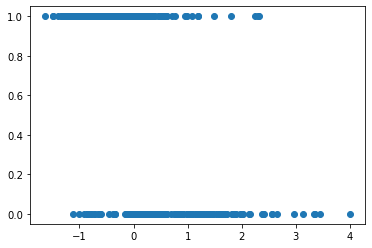

In [254]:
plt.scatter(X_train[:,5],y_train);
# print(X_train[:,0])

### Model train & test

In [263]:
# loss = logit / simple
logit = True
model ,train_losses, test_losses , train_accs, test_accs= create_model_and_train(X_train,y_train,X_test,y_test,D,logit=logit,n_epochs=1000)

epoch 1/1000, Train Loss: 0.6843, Test Loss: 0.6995
epoch 101/1000, Train Loss: 0.5656, Test Loss: 0.5787
epoch 201/1000, Train Loss: 0.5283, Test Loss: 0.5398
epoch 301/1000, Train Loss: 0.5120, Test Loss: 0.5225
epoch 401/1000, Train Loss: 0.5022, Test Loss: 0.5123
epoch 501/1000, Train Loss: 0.4954, Test Loss: 0.5057
epoch 601/1000, Train Loss: 0.4906, Test Loss: 0.5014
epoch 701/1000, Train Loss: 0.4872, Test Loss: 0.4982
epoch 801/1000, Train Loss: 0.4844, Test Loss: 0.4957
epoch 901/1000, Train Loss: 0.4822, Test Loss: 0.4938


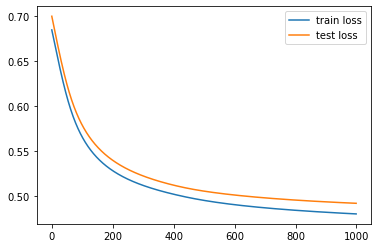

In [264]:
plot_test_and_train_metric(train_losses, test_losses,"loss")

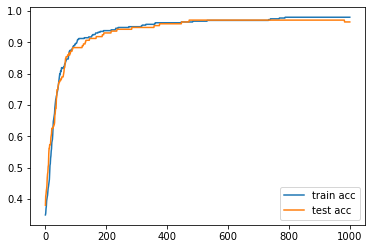

In [265]:
plot_test_and_train_metric(train_accs, test_accs,"acc")

In [266]:
y_pred_train = predict_model(model,X_train,logit=logit)
model_result_printer(model,y_train,y_pred_train,usage="out",mode="train")

y_pred_test = predict_model(model,X_test,logit=logit)
model_result_printer(model,y_test,y_pred_test,usage="out",mode="test")

-------train-------
acc:                 0.9798994974874372
f1:                  0.9843749999999999
precision:           0.9767441860465116
recall:              0.9921259842519685
-------test-------
acc:                 0.9649122807017544
f1:                  0.970873786407767
precision:           0.970873786407767
recall:              0.970873786407767


### Save and Load model

In [198]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2111, -0.4139, -0.2328, -0.3894, -0.1384, -0.2563, -0.3325, -0.3128,
                       -0.1162,  0.3397, -0.5459,  0.2849, -0.5516, -0.3634,  0.0421,  0.0230,
                       -0.0016, -0.1490,  0.3386,  0.4185, -0.2019, -0.4862, -0.5104, -0.3476,
                       -0.4622, -0.0757, -0.1109, -0.3192, -0.4953, -0.2029]])),
             ('0.bias', tensor([0.3440]))])

In [199]:
path = "./model/classification_model.pt"
torch.save(model.state_dict(),path)

In [200]:
# Load model
loaded_model = create_model_and_load(path)

In [201]:
y_pred_train = predict_model(loaded_model,X_train)
model_result_printer(loaded_model,y_train,y_pred_train,usage="out",mode="train")

y_pred_test = predict_model(loaded_model,X_test)
model_result_printer(loaded_model,y_test,y_pred_test,usage="out",mode="test")

-------train-------
acc:                 0.9798994974874372
f1:                  0.9840637450199202
precision:           0.9801587301587301
recall:              0.988
-------test-------
acc:                 0.9824561403508771
f1:                  0.9859154929577464
precision:           0.9905660377358491
recall:              0.9813084112149533


In [202]:
# Download in colab - upload is the same

# from google.cloab import files
# files.download(path)